# TASK-3 : EDA - Retail Online Store


## Author : Prathmesh Mhatre

### GRIP @THE SPARK FOUNDATION 

### GRIPJANUARY23

### Problem Statement : 

1. Perform EDA on the Dataset
2. Find out weak areas you can work to make more profit 
3. What all business problem you can derive by EDA

In [52]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [53]:
df=pd.read_csv("SampleSuperstore.csv")

In [54]:
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [55]:
df = df.drop(['Postal Code'], axis =1)

In [56]:
df.shape

(9994, 12)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [58]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [59]:
#Description of the data set
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [60]:
#Check duplicate value
df.duplicated().sum()
#Deleting Duplicate values
df= df.drop_duplicates()
df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [61]:
#Unique Values in Category
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [62]:
#Unique Values in Sub-Category
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [63]:
#Counting the number of repititions of each value in Category.
df['Category'].value_counts()

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64

In [64]:
#Counting the number of repititions of each value in Sub-Category.
df['Sub-Category'].value_counts()

Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [65]:
#Checking for null values in the dataset
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Exploratory Data Analysis

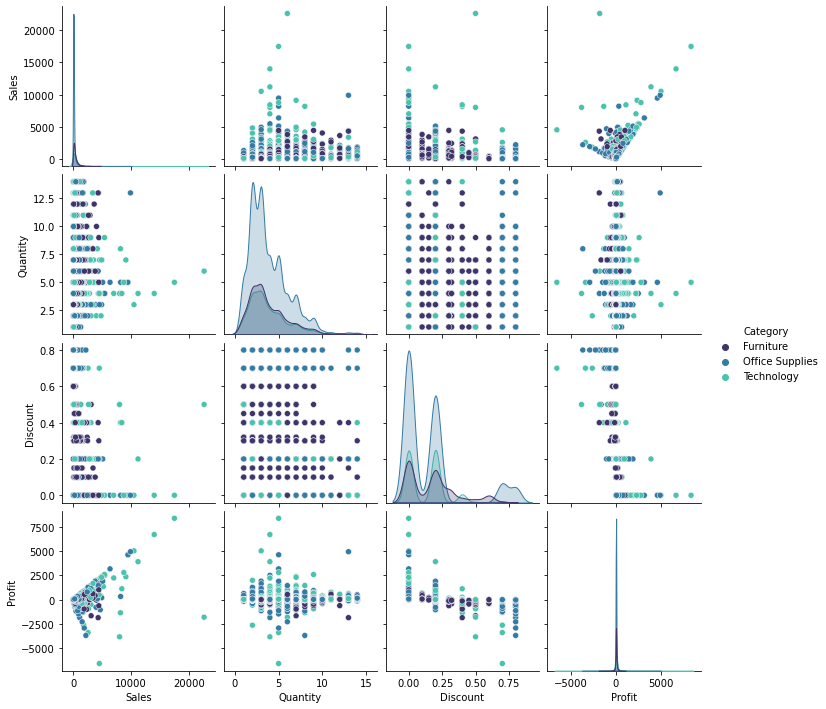

In [66]:
#Visualising the dataset s whole using the pairplot on the basis of categories
sns.pairplot(df, hue = 'Category',diag_kind='kde',palette='mako')

<AxesSubplot:>

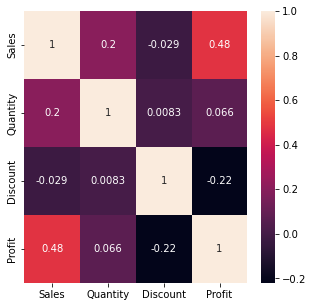

In [67]:
#Finding the paiwise correlation between the attributes and visualing them using heatmap
cor = df.corr()
#Visualising using Heatmap
plt.subplots(figsize = (5,5))
sns.heatmap(cor, annot = True)

<AxesSubplot:ylabel='Category'>

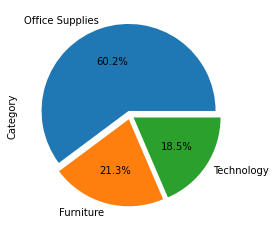

In [68]:
#Visualizing the categories of items sold using pie chart 
df.Category.value_counts().plot( kind = 'pie' , autopct= '%1.01f%%', explode = (0.05, 0.05, 0.05))

<AxesSubplot:xlabel='Category'>

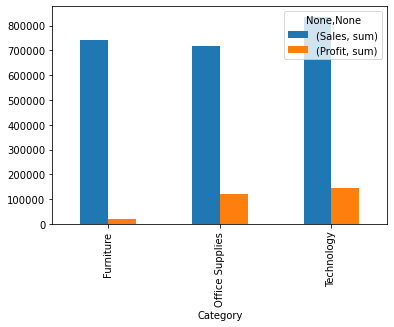

In [69]:
#Plotting the overall profit and overall sales of different categories of items 
df.groupby('Category')['Sales', 'Profit'].agg(['sum']).plot.bar()

Text(0.5, 1.0, 'Top Category Sales VS Profit')

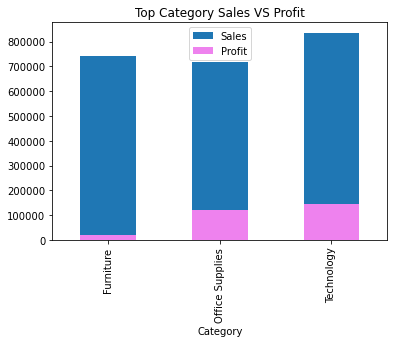

In [70]:
#Calculating the top selling category of items 
transform_s = df.groupby('Category').Sales.sum()
#calculating the top profit making category of items
transform_p = df.groupby('Category').Profit.sum()

#Visualising to understand it concisely
transform_s.plot( kind = 'bar' , fontsize = 10 , legend = True)
transform_p.plot( kind = 'bar' , fontsize = 10 , color = 'violet' ,legend = True)
plt.title('Top Category Sales VS Profit')

<AxesSubplot:xlabel='Region'>

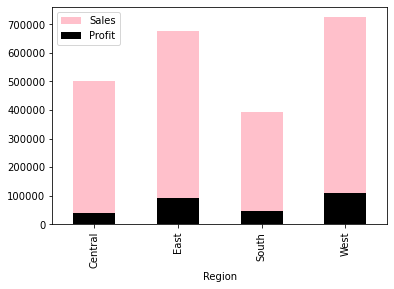

In [71]:
 #Calculating the top regions in term of sales made
transform_s = df.groupby('Region').Sales.sum()
#Calculating the top regions in term of profit generated
transform_p = df.groupby('Region').Profit.sum()

#Visualising to understand concisely
transform_s.plot( kind = 'bar' , fontsize = 10,color = 'Pink', legend = True )
transform_p.plot( kind = 'bar' , fontsize = 10, color = 'black', legend = True )

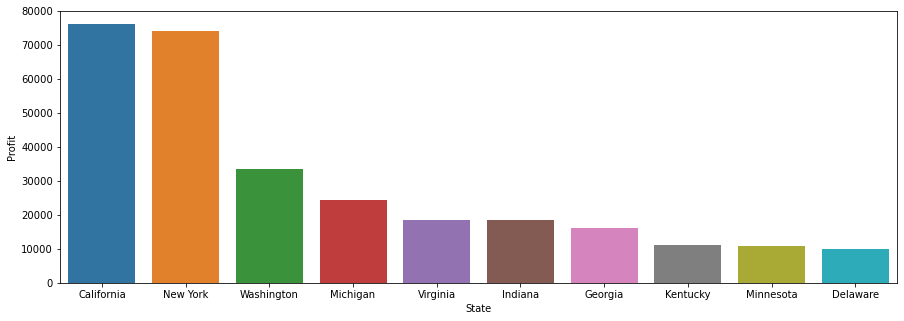

In [72]:
Top_state=df.groupby('State').sum().reset_index().sort_values('Profit',ascending=False)
Top10_States=Top_state[:10].loc[:,('State','Profit')]
plt.figure(figsize=(15,5))
sns.barplot(data=Top10_States,x='State',y='Profit')
plt.show()

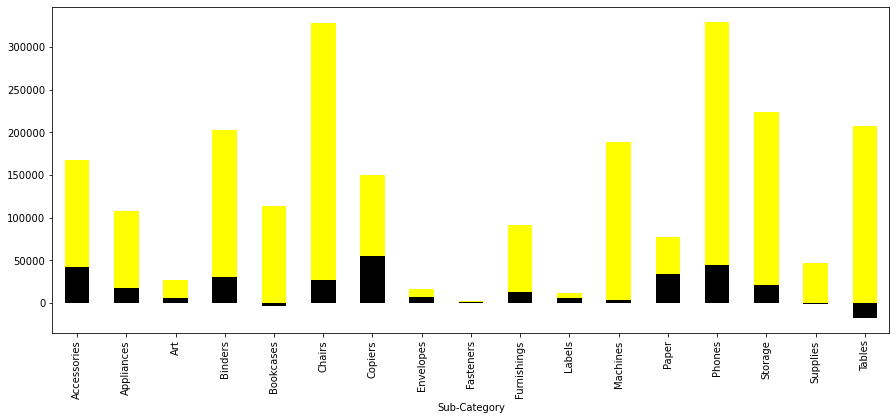

In [73]:
#Calculating the sales made in product subcategory
transform_s = df.groupby('Sub-Category').Sales.sum()
#Calculating the sales made in product subacategory
transform_p = df.groupby('Sub-Category').Profit.sum()

#Visualising to understand concisely
plt.subplots(figsize = (15,6))
transform_s.plot( kind = 'bar' ,color = 'yellow', fontsize = 10)
transform_p.plot( kind = 'bar' , fontsize = 10 , color = 'black')
plt.show()

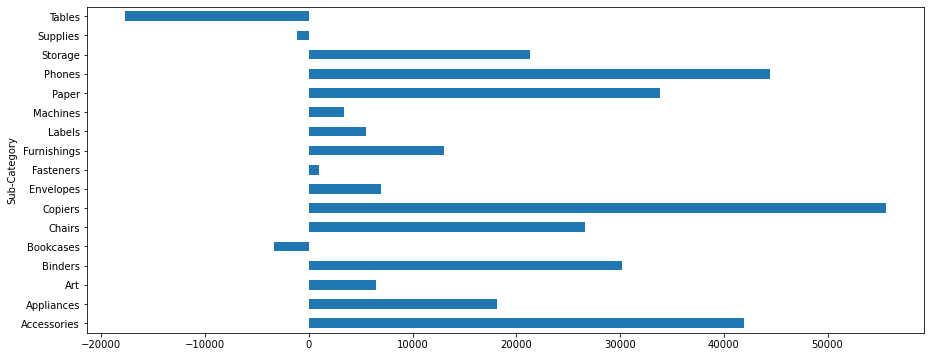

In [74]:
#plotting the profit made in product subcategory horizontally
plt.subplots(figsize = (15,6))
transform_p.plot( kind = 'barh' , fontsize = 10 )
plt.show()

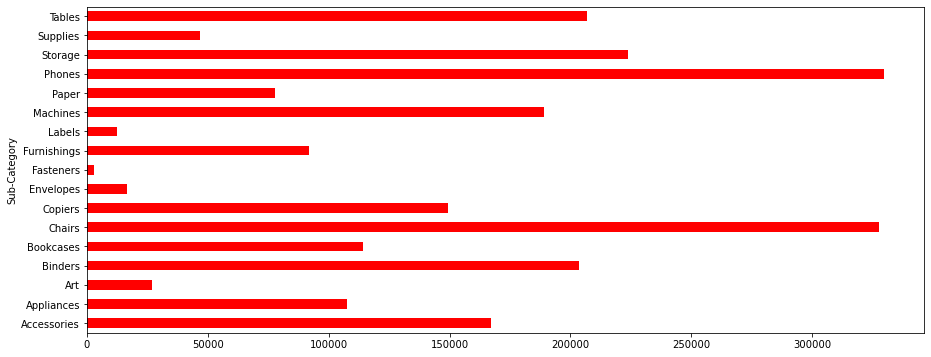

In [75]:
#plotting the sale made in product subcategory horizontally
plt.subplots(figsize = (15,6))
transform_s .plot( kind = 'barh' , fontsize = 10 , color = 'red')
plt.show()

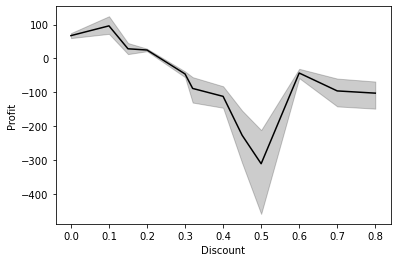

In [76]:
#Plotting the discount and profit
sns.lineplot(data=df ,x ='Discount', y ='Profit', color='black')
plt.show()

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

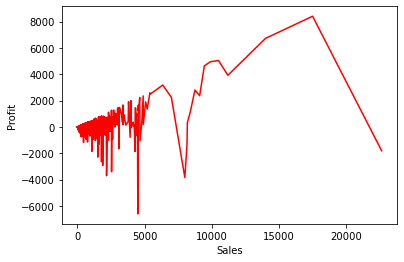

In [77]:
#Plotting the sale and profit
sns.lineplot(data=df ,x ='Sales', y ='Profit', color='red')

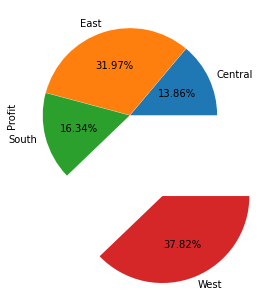

In [78]:
# Visualising the share of Profit over different regions using pie charts
df.groupby('Region').sum().plot(kind = 'pie', y = 'Profit',autopct='%1.02f%%', explode = (0.0025, 0.0025, 0.0025, 1), legend= False)
plt.show()

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

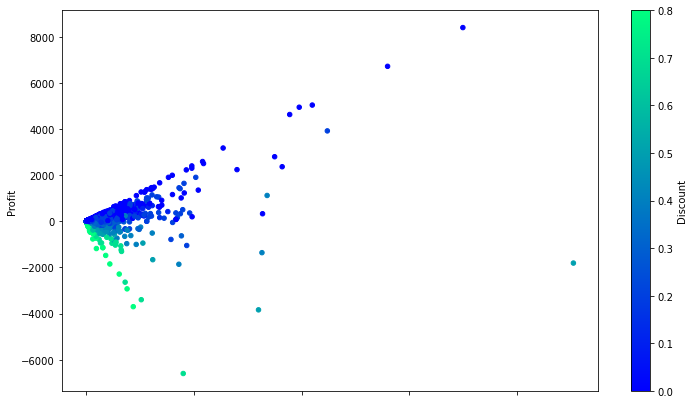

In [79]:
#scatter plot on interdependency of sales and profit with respect to discount
df.plot(kind = 'scatter', figsize = (12,7), x = 'Sales', y = 'Profit', c = 'Discount', cmap= 'winter')